In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\andre\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [4]:
import pandas as pd

df = pd.read_csv(path + "/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Prepare data
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Class')  # Remove the class column
data = df[numeric_features]

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # This is already a numpy array
data_scaled

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]], shape=(284807, 30))


Trying k=3:


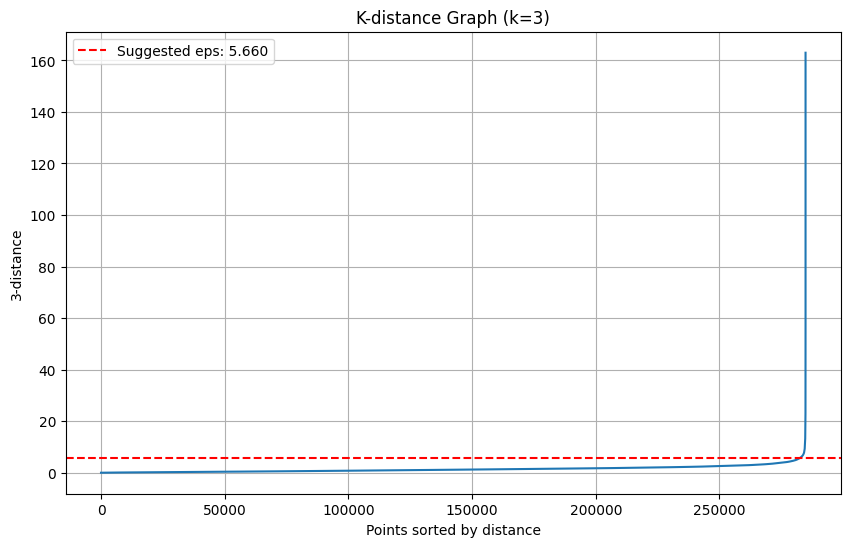

eps: 5.660
min_samples: 4

Trying k=4:


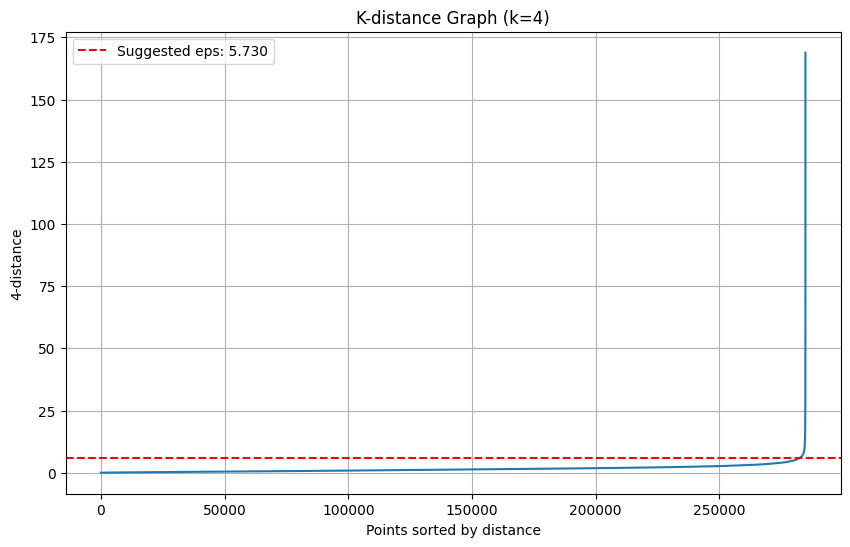

eps: 5.730
min_samples: 5

Trying k=5:


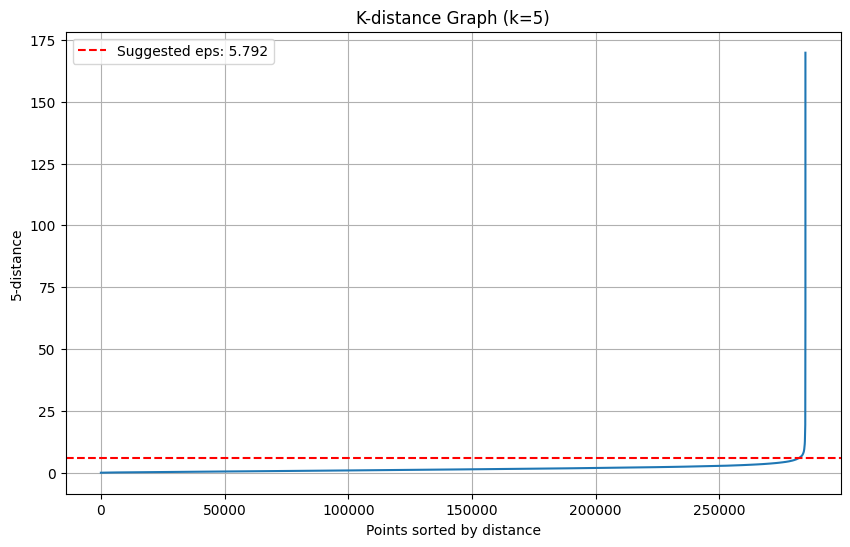

eps: 5.792
min_samples: 6

Trying k=6:


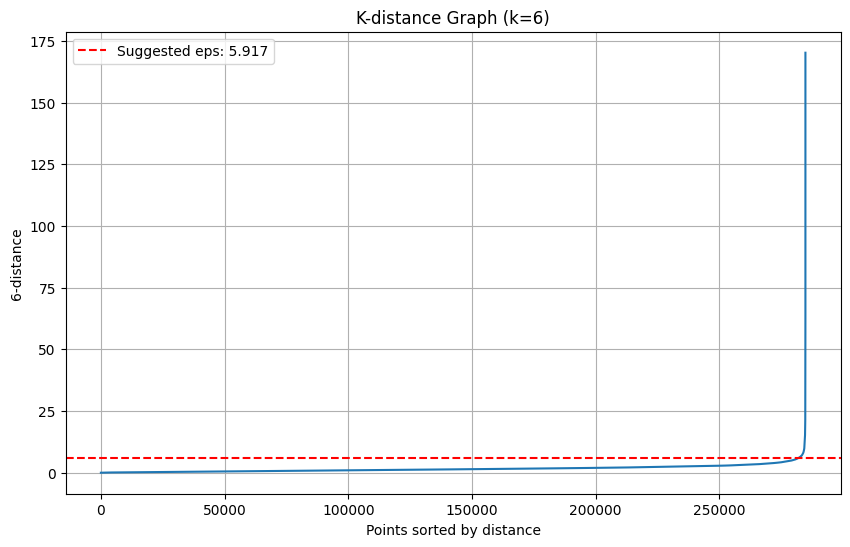

eps: 5.917
min_samples: 7

Summary of all trials:
   k       eps  min_samples
0  3  5.659788            4
1  4  5.730403            5
2  5  5.791520            6
3  6  5.917360            7


In [7]:

def optimize_dbscan_params(data_scaled, k=4, sample_size=10**10):
    """
    Optimize DBSCAN parameters for scaled data
    
    Parameters:
    -----------
    data_scaled : numpy array
        Scaled input data
    k : int, default=4
        Number of neighbors for k-distance
    sample_size : int, default=10000
        Maximum number of points to use for optimization
    """
    # Convert to numpy array if it's a DataFrame
    if isinstance(data_scaled, pd.DataFrame):
        data_scaled = data_scaled.to_numpy()
    
    # Sample data if needed
    if len(data_scaled) > sample_size:
        indices = np.random.choice(len(data_scaled), sample_size, replace=False)
        data_sample = data_scaled[indices]
    else:
        data_sample = data_scaled

    # Calculate k-distances
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(data_sample)
    distances, _ = nbrs.kneighbors(data_sample)
    
    # Sort k-distances
    k_distances = np.sort(distances[:, -1])
    
    # Plot k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(k_distances)), k_distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{k}-distance')
    plt.title(f'K-distance Graph (k={k})')
    plt.grid(True)
    
    # Find elbow point
    elbow_point = find_elbow(k_distances)
    plt.axhline(y=elbow_point, color='r', linestyle='--', 
                label=f'Suggested eps: {elbow_point:.3f}')
    plt.legend()
    plt.show()
    
    return elbow_point, k + 1

def find_elbow(k_distances):
    """Find elbow point using maximum curvature method"""
    nPoints = len(k_distances)
    allCoord = np.vstack((range(nPoints), k_distances)).T
    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecN = lineVec / np.sqrt(np.sum(lineVec**2))
    
    vecFromFirst = allCoord - firstPoint
    scalarProduct = np.sum(vecFromFirst * lineVecN, axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecN)
    vecToLine = vecFromFirst - vecFromFirstParallel
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    
    idxOfBestPoint = np.argmax(distToLine)
    return k_distances[idxOfBestPoint]



# Optional: Try different k values
k_values = [3, 4, 5, 6]
results = []
for k in k_values:
    print(f"\nTrying k={k}:")
    eps, min_samples = optimize_dbscan_params(data_scaled, k=k)
    results.append({
        'k': k,
        'eps': eps,
        'min_samples': min_samples
    })
    print(f"eps: {eps:.3f}")
    print(f"min_samples: {min_samples}")

# Create a summary DataFrame of results
results_df = pd.DataFrame(results)
print("\nSummary of all trials:")
print(results_df)

Original fraud ratio: 0.0017
Sampled fraud ratio: 0.0139
Total sample size: 35492


Testing parameter pairs:  25%|██▌       | 1/4 [00:41<02:03, 41.08s/it]

Found 22 clusters, best fraud ratio: 1.000


Testing parameter pairs:  50%|█████     | 2/4 [01:04<01:00, 30.43s/it]

Found 14 clusters, best fraud ratio: 1.000


Testing parameter pairs:  75%|███████▌  | 3/4 [01:44<00:35, 35.12s/it]

Found 11 clusters, best fraud ratio: 1.000


Testing parameter pairs: 100%|██████████| 4/4 [02:08<00:00, 32.24s/it]


Found 8 clusters, best fraud ratio: 1.000

Results sorted by fraud concentration:
    eps  min_samples  n_clusters  n_noise  noise_ratio  \
0  5.66            4          22      569     0.016032   
1  5.73            5          14      595     0.016764   
2  5.79            6          11      612     0.017243   
3  5.91            7           8      621     0.017497   

   best_cluster_fraud_ratio  best_cluster_size  best_cluster_frauds  
0                       1.0                 21                 21.0  
1                       1.0                 21                 21.0  
2                       1.0                 21                 21.0  
3                       1.0                 21                 21.0  


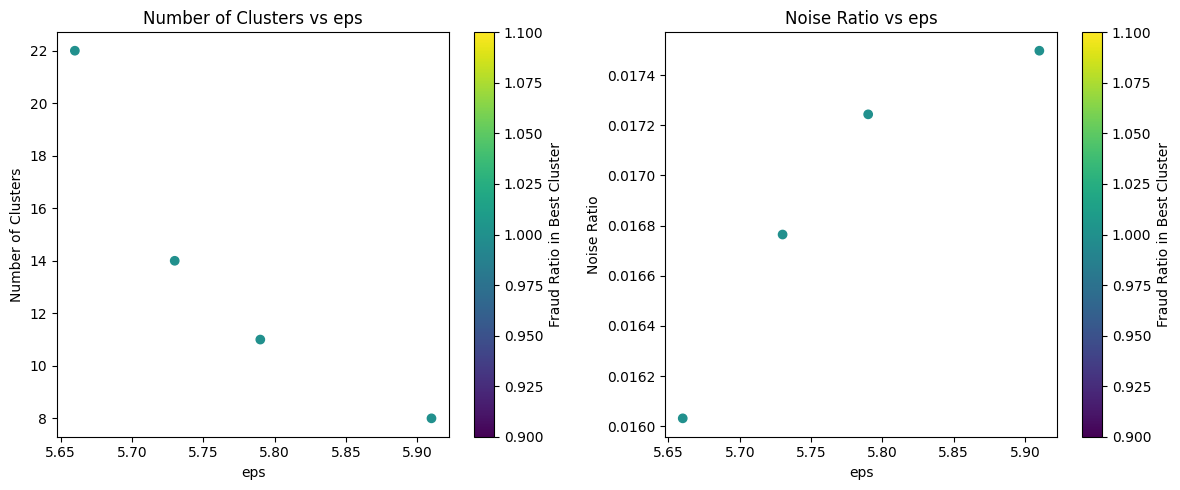

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from tqdm import tqdm 

def balanced_sampling_for_dbscan(data_scaled, true_labels, sample_size=50000, fraud_ratio=0.1):
    """
    Sample data with increased representation of fraud cases
    
    Parameters:
    -----------
    data_scaled : array-like
        Scaled input data
    true_labels : array-like
        Binary fraud labels (0: normal, 1: fraud)
    sample_size : int
        Desired total sample size
    fraud_ratio : float
        Desired ratio of fraud cases in sample (e.g., 0.3 = 30% frauds)
    """
    # Separate fraud and normal cases
    fraud_mask = true_labels == 1
    normal_mask = ~fraud_mask
    
    fraud_data = data_scaled[fraud_mask]
    normal_data = data_scaled[normal_mask]
    
    # Calculate sample sizes
    n_frauds = int(sample_size * fraud_ratio)
    n_normal = sample_size - n_frauds
    
    # Ensure we don't sample more frauds than available
    n_frauds = min(n_frauds, len(fraud_data))
    
    # Sample from each class
    np.random.seed(42)  # for reproducibility
    
    # Sample with replacement for fraud (if needed)
    if n_frauds > len(fraud_data):
        fraud_indices = np.random.choice(len(fraud_data), n_frauds, replace=True)
    else:
        fraud_indices = np.random.choice(len(fraud_data), n_frauds, replace=False)
        
    normal_indices = np.random.choice(len(normal_data), n_normal, replace=False)
    
    # Combine samples
    sampled_data = np.vstack([
        fraud_data[fraud_indices],
        normal_data[normal_indices]
    ])
    
    sampled_labels = np.hstack([
        np.ones(n_frauds),
        np.zeros(n_normal)
    ])
    
    # Shuffle the combined data
    shuffle_idx = np.random.permutation(len(sampled_data))
    
    print(f"Original fraud ratio: {fraud_mask.mean():.4f}")
    print(f"Sampled fraud ratio: {(sampled_labels == 1).mean():.4f}")
    print(f"Total sample size: {len(sampled_data)}")
    
    return sampled_data[shuffle_idx], sampled_labels[shuffle_idx]

# Modified evaluation function
def evaluate_dbscan_params(data_scaled, param_pairs, true_labels, sample_size=50000, fraud_ratio=0.3):
    """Modified evaluation function with balanced sampling"""
    # Sample data with increased fraud representation
    data_sample, labels_sample = balanced_sampling_for_dbscan(
        data_scaled, 
        true_labels, 
        sample_size=sample_size,
        fraud_ratio=fraud_ratio
    )
    
    results = []
    for eps, minpts in tqdm(param_pairs, desc="Testing parameter pairs"):
        dbscan = DBSCAN(
            eps=eps, 
            min_samples=minpts, 
            n_jobs=-1,
            algorithm='kd_tree'
        )
        clusters = dbscan.fit_predict(data_sample)
        
        # Skip if all points are noise
        if len(np.unique(clusters)) <= 1:
            tqdm.write("Skipping: All points classified as noise")
            continue
            
        # Calculate metrics
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        
        # Calculate fraud concentration in each cluster
        cluster_metrics = []
        for cluster_id in set(clusters):
            if cluster_id == -1:  # Skip noise points
                continue
                
            cluster_mask = clusters == cluster_id
            cluster_frauds = labels_sample[cluster_mask].sum()
            cluster_total = cluster_mask.sum()
            fraud_ratio = cluster_frauds / cluster_total
            
            cluster_metrics.append({
                'cluster_id': cluster_id,
                'size': cluster_total,
                'n_frauds': cluster_frauds,
                'fraud_ratio': fraud_ratio
            })
        
        # Find cluster with highest fraud concentration
        if cluster_metrics:
            best_cluster = max(cluster_metrics, key=lambda x: x['fraud_ratio'])
            tqdm.write(f"Found {n_clusters} clusters, best fraud ratio: {best_cluster['fraud_ratio']:.3f}")
        else:
            best_cluster = {'fraud_ratio': 0, 'size': 0, 'n_frauds': 0}
            tqdm.write("No valid clusters found")
        
        results.append({
            'eps': eps,
            'min_samples': minpts,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': n_noise / len(data_sample),
            'best_cluster_fraud_ratio': best_cluster['fraud_ratio'],
            'best_cluster_size': best_cluster['size'],
            'best_cluster_frauds': best_cluster['n_frauds']
        })
    
    return pd.DataFrame(results)
# Define the specific eps-minpts pairs
param_pairs = [
    (5.66, 4),  # k=3 result
    (5.73, 5),  # k=4 result
    (5.79, 6),  # k=5 result
    (5.91, 7)   # k=6 result
]

# Evaluate parameters
results_df = evaluate_dbscan_params(
    data_scaled,
    param_pairs,
    df['Class'].values , # true fraud labels,
    sample_size=50000,
    fraud_ratio=0.3
)

# Sort by fraud concentration in best cluster
print("\nResults sorted by fraud concentration:")
print(results_df.sort_values('best_cluster_fraud_ratio', ascending=False))

# Plot some key metrics
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(results_df['eps'], results_df['n_clusters'], 
            c=results_df['best_cluster_fraud_ratio'], cmap='viridis')
plt.colorbar(label='Fraud Ratio in Best Cluster')
plt.xlabel('eps')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs eps')

plt.subplot(122)
plt.scatter(results_df['eps'], results_df['noise_ratio'],
            c=results_df['best_cluster_fraud_ratio'], cmap='viridis')
plt.colorbar(label='Fraud Ratio in Best Cluster')
plt.xlabel('eps')
plt.ylabel('Noise Ratio')
plt.title('Noise Ratio vs eps')

plt.tight_layout()
plt.show()

Original fraud ratio: 0.0017
Sampled fraud ratio: 0.0017
Total sample size: 50000

=== Basic Cluster Statistics ===

Cluster sizes and fraud ratios:
          Size  Frauds  Fraud_Ratio
Cluster                            
-1         646    47.0       0.0728
 0       49294    13.0       0.0003
 1           8     8.0       1.0000
 2           5     0.0       0.0000
 3           5     2.0       0.4000
 4           4     3.0       0.7500
 5           8     0.0       0.0000
 6           4     0.0       0.0000
 7           5     5.0       1.0000
 8           4     0.0       0.0000
 9          12     8.0       0.6667
 10          2     0.0       0.0000
 11          3     0.0       0.0000

=== Feature Characteristics by Cluster ===

Top distinguishing features per cluster:

Cluster 0 (Size: 49294):
V2: effect size = 1.719
V4: effect size = 0.835
Amount: effect size = 0.652
V5: effect size = 0.651
V9: effect size = 0.587

Cluster 1 (Size: 8):
V18: effect size = 15.258
V8: effect size = 14.008
V4

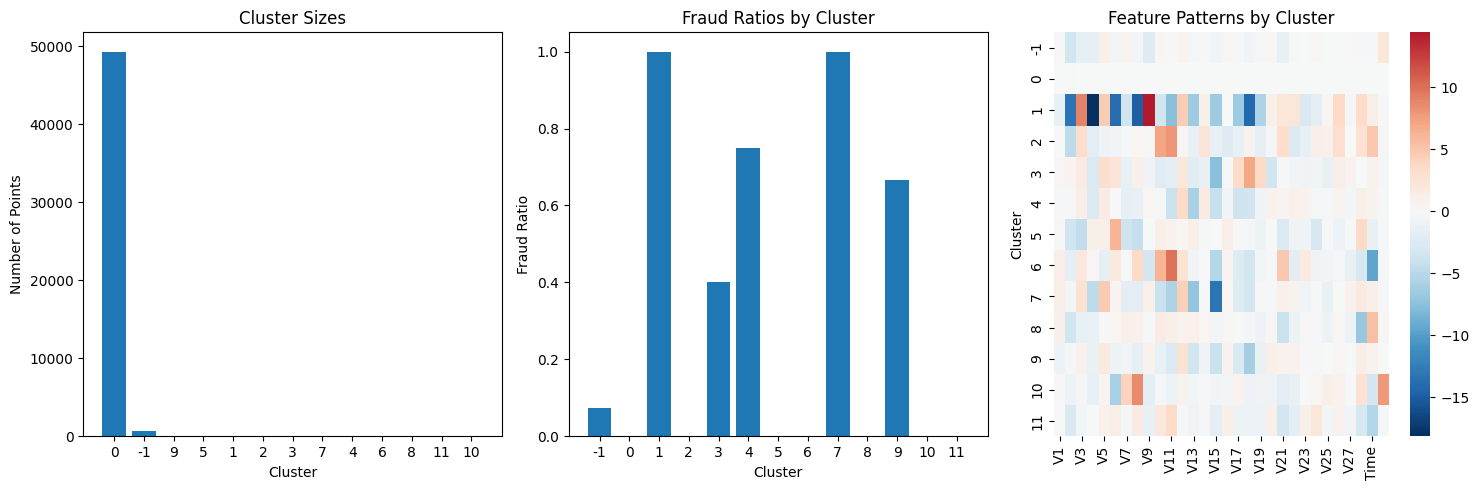

In [9]:
import seaborn as sns

def analyze_dbscan_clusters(data_scaled, clusters, true_labels, feature_names):
    """
    Analyze DBSCAN clustering results
    """
    # Convert to DataFrame for easier analysis
    df_analysis = pd.DataFrame(data_scaled, columns=feature_names)
    df_analysis['Cluster'] = clusters
    df_analysis['Is_Fraud'] = true_labels
    
    # 1. Basic cluster statistics
    print("\n=== Basic Cluster Statistics ===")
    cluster_stats = df_analysis.groupby('Cluster').agg({
        'Is_Fraud': ['count', 'sum', 'mean']
    }).round(4)
    cluster_stats.columns = ['Size', 'Frauds', 'Fraud_Ratio']
    print("\nCluster sizes and fraud ratios:")
    print(cluster_stats)
    
    # 2. Feature characteristics per cluster
    print("\n=== Feature Characteristics by Cluster ===")
    cluster_features = df_analysis.groupby('Cluster')[feature_names].agg(['mean', 'std'])
    
    # Find top distinguishing features for each cluster
    print("\nTop distinguishing features per cluster:")
    for cluster in sorted(set(clusters)):
        if cluster == -1:
            continue
        
        # Calculate z-scores for this cluster vs others
        cluster_mask = clusters == cluster
        cluster_data = data_scaled[cluster_mask]
        other_data = data_scaled[~cluster_mask]
        
        # Calculate effect sizes (Cohen's d)
        effect_sizes = []
        for i, feature in enumerate(feature_names):
            c_mean = np.mean(cluster_data[:, i])
            c_std = np.std(cluster_data[:, i])
            o_mean = np.mean(other_data[:, i])
            o_std = np.std(other_data[:, i])
            
            # Pooled standard deviation
            pooled_std = np.sqrt(((c_std ** 2) + (o_std ** 2)) / 2)
            effect_size = abs(c_mean - o_mean) / pooled_std
            effect_sizes.append((feature, effect_size))
        
        # Sort and display top features
        top_features = sorted(effect_sizes, key=lambda x: x[1], reverse=True)[:5]
        print(f"\nCluster {cluster} (Size: {sum(cluster_mask)}):")
        for feature, effect in top_features:
            print(f"{feature}: effect size = {effect:.3f}")
    
    # 3. Fraud concentration analysis
    print("\n=== Fraud Analysis ===")
    fraud_mask = true_labels == 1
    print(f"Total frauds captured in clusters: {sum(fraud_mask & (clusters != -1))}")
    print(f"Total frauds in noise: {sum(fraud_mask & (clusters == -1))}")
    
    # Calculate fraud capture rate per cluster
    total_frauds = sum(fraud_mask)
    for cluster in sorted(set(clusters)):
        if cluster == -1:
            continue
        cluster_frauds = sum(fraud_mask & (clusters == cluster))
        print(f"Cluster {cluster} captures {cluster_frauds} ({cluster_frauds/total_frauds*100:.1f}%) of all frauds")
    
    # 4. Visualization of key patterns
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Cluster sizes
    plt.subplot(131)
    cluster_sizes = df_analysis['Cluster'].value_counts()
    plt.bar(cluster_sizes.index.astype(str), cluster_sizes.values)
    plt.title('Cluster Sizes')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Points')
    
    # Plot 2: Fraud ratios
    plt.subplot(132)
    fraud_ratios = df_analysis.groupby('Cluster')['Is_Fraud'].mean()
    plt.bar(fraud_ratios.index.astype(str), fraud_ratios.values)
    plt.title('Fraud Ratios by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Fraud Ratio')
    
    # Plot 3: Feature importance heatmap
    plt.subplot(133)
    cluster_means = df_analysis.groupby('Cluster')[feature_names].mean()
    sns.heatmap(cluster_means, cmap='RdBu_r', center=0)
    plt.title('Feature Patterns by Cluster')
    plt.tight_layout()
    plt.show()
    
    return cluster_stats, cluster_features

# Get a sample for detailed analysis
data_sample, labels_sample = balanced_sampling_for_dbscan(
    data_scaled, 
    df['Class'].values,
    sample_size=50000,
    fraud_ratio=0.00172
)

# Run DBSCAN with best parameters
best_dbscan = DBSCAN(
    eps=5.66,
    min_samples=4,
    n_jobs=-1,
    algorithm='kd_tree'
)
best_clusters = best_dbscan.fit_predict(data_sample)

# Define feature names
feature_names = [f'V{i}' for i in range(1, 29)] + ['Time', 'Amount']

# Analyze clusters
cluster_stats, cluster_features = analyze_dbscan_clusters(
    data_sample,
    best_clusters,
    labels_sample,
    feature_names
)